In [19]:
%pylab inline
import numpy as np
import pandas as pd
import os

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [20]:
DATA_FOLDER = "data/"
MODEL_FOLDER = "models/hw_linear-regression_try-lr/"
OUTPUT_FOLDER = "outputs/"
TRAIN_FILE_PATH = DATA_FOLDER + "train.csv"
TEST_FILE_PATH = DATA_FOLDER + "test_X.csv"

In [21]:
if not os.path.exists(MODEL_FOLDER):
    os.makedirs(MODEL_FOLDER)

In [22]:
# read train data
train_data = pd.read_csv(TRAIN_FILE_PATH, header=0, encoding="big5")

In [23]:
# preprocess train data
train_data[train_data=="NR"] = 0

In [24]:
train_data.head(18)

,日期,測站,測項,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,2014/1/1,豐原,AMB_TEMP,14,14,14,13,12,12,12,...,22,22,21,19,17,16,15,15,15,15
1,2014/1/1,豐原,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,2014/1/1,豐原,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,2014/1/1,豐原,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,...,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
4,2014/1/1,豐原,NO,0.9,0.6,0.5,1.7,1.8,1.5,1.9,...,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5
5,2014/1/1,豐原,NO2,16,9.2,8.2,6.9,6.8,3.8,6.9,...,11,11,22,28,19,12,8.1,7,6.9,6
6,2014/1/1,豐原,NOx,17,9.8,8.7,8.6,8.5,5.3,8.8,...,14,13,25,30,21,13,9.7,8.6,8.7,7.5
7,2014/1/1,豐原,O3,16,30,27,23,24,28,24,...,65,64,51,34,33,34,37,38,38,36
8,2014/1/1,豐原,PM10,56,50,48,35,25,12,4,...,52,51,66,85,85,63,46,36,42,42
9,2014/1/1,豐原,PM2.5,26,39,36,35,31,28,25,...,36,45,42,49,45,44,41,30,24,13


In [25]:
# concat 20 days data
train_array_months = []  # 12 numpy.array, array's shape is (18, 480)
for month in range(12):
    temp_train_array = np.concatenate( [train_data[(360*month+18*day):(360*month+18*(day+1))][list(range(3, 27))].apply(pd.to_numeric).as_matrix() for day in range(20)], axis=1)
    train_array_months.append(temp_train_array)

In [26]:
# use part of data
x_row_num = 18
x_col_num = 9

train_array_months_processed = train_array_months

## Train

In [27]:
w = np.random.randn(x_row_num, x_col_num)
b = np.random.randn()
total_epoch = 0

In [28]:
prev_loss = np.inf

In [29]:
# momentum
gamma = 0.9
vb = 0
vw = np.zeros((x_row_num, x_col_num))

In [30]:
b = np.random.randn()
w = np.random.randn(x_row_num, x_col_num)

In [31]:
lr = 4 * 10**(-9)

In [32]:
# # load model
# model = np.load(MODEL_FOLDER + 'epo2100_los4.9199.npz')
# w = model['w']
# b = model['b']
# vb = model['vb']
# vw = model['vw']
# lr = model['lr']
# total_epoch = model['total_epoch']

In [33]:
lr_powers = list(range(-8, -15, -1))
lrs = [10**power for power in lr_powers]
losses_by_lr = []

init_w = np.random.randn(x_row_num, x_col_num)
init_b = np.random.randn()

for lr in lrs:
    print("training with lr =", lr)
    losses = []
    total_epoch = 0
    w = init_w
    b = init_b
    
    for epoch in range(1000):
        # one training epoch

        # reset temp variables 
        loss = 0
        b_grad = 0
        w_grad = np.zeros((x_row_num, x_col_num))

        # calculate loss and gradient over all training data
        for month in range(12):
            for hour in range(470):
                # extract x and y from training data
                # train_array_months is a list of 12 arrays
                # x will be an ?x9 numpy array. '?' depends on how we process training data
                x = train_array_months_processed[month][:, hour:hour+9]
                y_data = train_array_months[month][9, hour+9]

                # calculate y from x, w, b
                y_pred= einsum('ij,ij', x, w) + b

                # update loss
                diff = y_data - y_pred
                loss += diff * diff

                # update gradient of b and w
                mult = 2 * diff * (-1)
                b_grad += mult
                w_grad += mult * x  # 2 * diff * (-1) * x

        # calculate rms error
        loss = sqrt(loss/(12*470))
        
        # stop training in some cases
        if loss > 1000:
            break
        
        losses.append(loss)

        if epoch % 100 == 0:
            print(total_epoch, loss)

        # update parameters
        b = b - lr * b_grad
        w = w - lr * w_grad
        total_epoch += 1
    
    losses_by_lr.append(losses)
        
print('end of training')

training with lr = 1e-08
0 285.620668975
training with lr = 1e-09
0 285.620668975
training with lr = 1e-10
0 285.620668975
100 153.539211168
200 116.69768843
300 94.5753719639
400 80.7889947775
500 71.9236953009
600 65.9790821105
700 61.7715513992
800 58.6086594719
900 56.0891135048
training with lr = 1e-11
0 285.620668975
100 213.70474469
200 204.410659134
300 196.147361308
400 188.649552693
500 181.756071539
600 175.363446933
700 169.400985722
800 163.817307246
900 158.572954942
training with lr = 1e-12
0 285.620668975
100 241.037014797
200 227.010233554
300 222.348560125
400 220.298438593
500 218.962993544
600 217.830597824
700 216.764482664
800 215.727841879
900 214.710437842
training with lr = 1e-13
0 285.620668975
100 278.65131628
200 272.390882401
300 266.776721411
400 261.749974429
500 257.255591696
600 253.242324781
700 249.66268552
800 246.472871099
900 243.632657021
training with lr = 1e-14
0 285.620668975
100 284.890183913
200 284.167376232
300 283.452178302
400 282.7445228

## Plot

In [38]:
losses_by_lr[0] = [285.62066897521697]

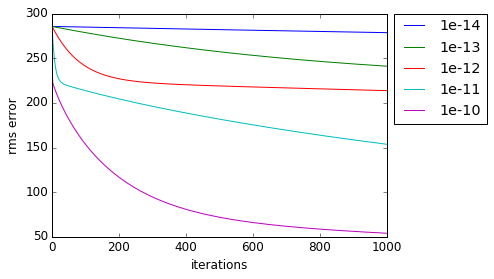

In [42]:
# log_losses_by_lr = [np.log(losses) for losses in losses_by_lr]

rcParams.update({'font.size': 12})
figure(figsize=(6, 4), dpi=240, edgecolor='k')

for i in range(len(losses_by_lr)-1, 1, -1):
    plot(losses_by_lr[i], label=str(lrs[i]))

ylabel('rms error')
xlabel('iterations')
legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0)